In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [5]:
data = pd.read_csv("../data/threshold_90percentile/ca_data_version_17.csv")

In [6]:
data.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,40.633080,-122.314591,1.0,CA,0.026765,1.910786,702.0,0.026765,0.0,0.0,...,1.0,185.0,NaN,5.573046,"[93473.66454398488, 78248.05013653943, 124645....","[117.3458680717152, 99.39957511771797, 162.198...","[3.785350582958554, 3.549984825632785, 5.23220...","[98052.30037706059, 82286.97517169513, 130677....",1.506568e+06,13.5433
1,40.496202,-122.293018,1.0,CA,0.014312,1.127613,3.0,0.014312,0.0,0.0,...,0.0,149.0,NaN,5.522022,"[74592.6287811629, 83370.48168344896, 130088.9...","[93.63007508626477, 105.692206308516, 169.3173...","[3.020325002782735, 3.774721653875571, 5.46184...","[78508.67122917825, 87613.00205050594, 136325....",1.490699e+06,14.0202
2,38.267033,-122.271446,1.0,CA,0.034076,NaN,3.0,0.034076,0.0,1.0,...,1.0,9.0,NaN,5.622299,"[92126.2550424327, 89064.40533523557, 128839.5...","[112.333561105272, 111.1445319302946, 165.0815...","[3.623663261460389, 3.969447568939093, 5.32521...","[96676.26859564037, 93532.47717835204, 135056....",1.573588e+06,6.6744
3,38.227924,-122.098865,1.0,CA,0.032722,2.263317,4.0,0.032722,0.0,0.0,...,0.0,10.0,NaN,5.836747,"[95636.588127896, 114983.9387991452, 140340.06...","[116.0314314180241, 143.7299506017422, 177.809...","[3.742949400581423, 5.133212521490793, 5.73580...","[100311.9908810605, 120432.7997151909, 147046....",1.650112e+06,8.4137
4,37.719517,-121.904712,1.0,CA,0.028839,NaN,5.0,0.030839,0.0,1.0,...,2.0,117.0,NaN,5.903124,"[90133.33737603408, 113757.4022359532, 148714....","[111.0064981450139, 141.8326228652107, 188.570...","[3.580854778871415, 5.065450816614666, 6.08292...","[94625.84469786189, 119241.6885916102, 155706....",1.669385e+06,8.5320


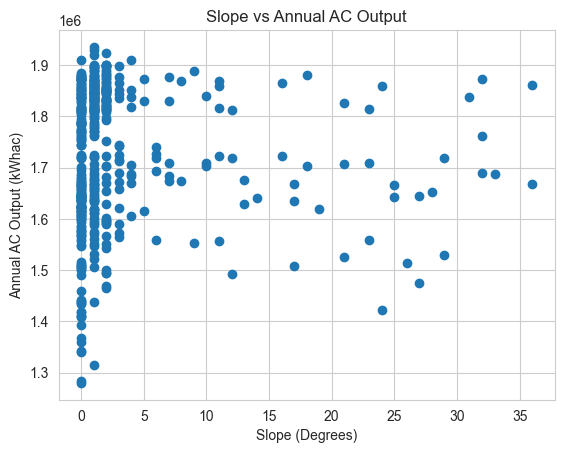

In [7]:
x = data['slope']
y = data['ac_annual']


plt.scatter(x,y)
plt.xlabel('Slope (Degrees)')
plt.ylabel('Annual AC Output (kWhac)')

plt.title('Slope vs Annual AC Output')

plt.show()

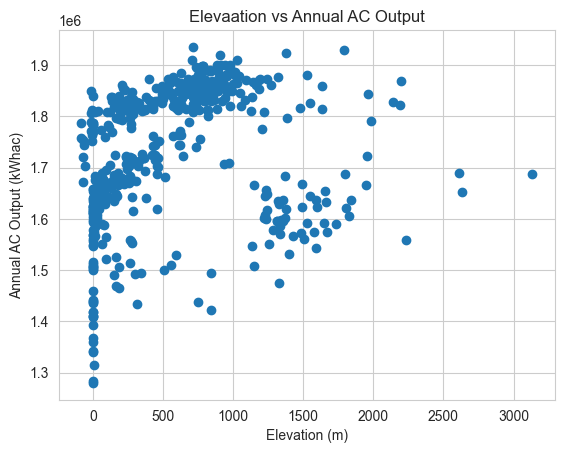

In [8]:
x = data['elevation']
y = data['ac_annual']

plt.xlabel('Elevation (m)')
plt.ylabel('Annual AC Output (kWhac)')

plt.title('Elevaation vs Annual AC Output')

plt.scatter(x,y)
plt.show()

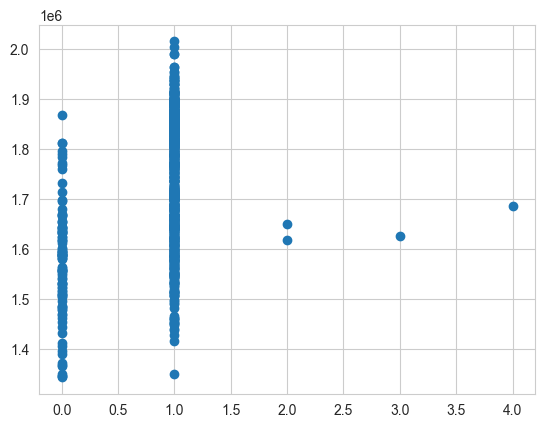

In [5]:
x = data['land_cover']
y = data['ac_annual']



plt.scatter(x,y)
plt.show()

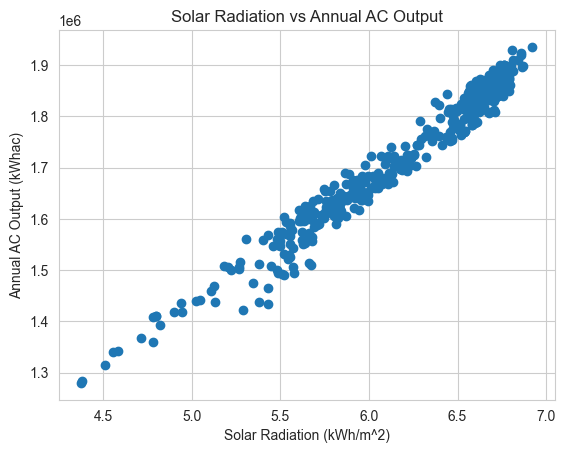

In [9]:
x = data['solrad_annual']
y = data['ac_annual']

plt.xlabel('Solar Radiation (kWh/m^2)')
plt.ylabel('Annual AC Output (kWhac)')

plt.title('Solar Radiation vs Annual AC Output')

plt.scatter(x,y)
plt.show()

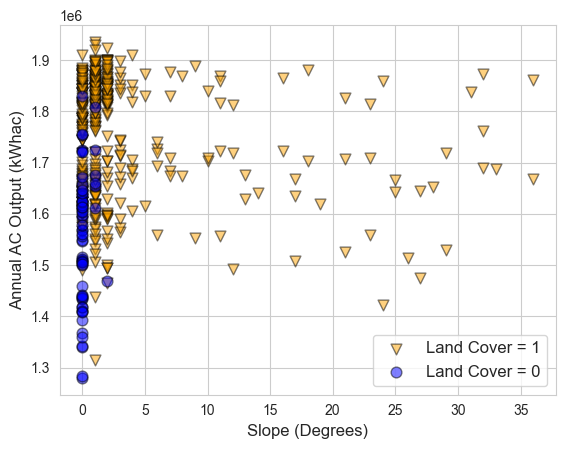

In [10]:
plt.scatter(data.loc[data.land_cover==1].slope,
               data.loc[data.land_cover==1].ac_annual,
               label="Land Cover = 1",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='orange')
plt.scatter(data.loc[data.land_cover==0].slope,
               data.loc[data.land_cover==0].ac_annual,
               label="Land Cover = 0",
               marker='o',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='blue')

plt.xlabel("Slope (Degrees)", fontsize=12)
plt.ylabel("Annual AC Output (kWhac)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)


plt.show()

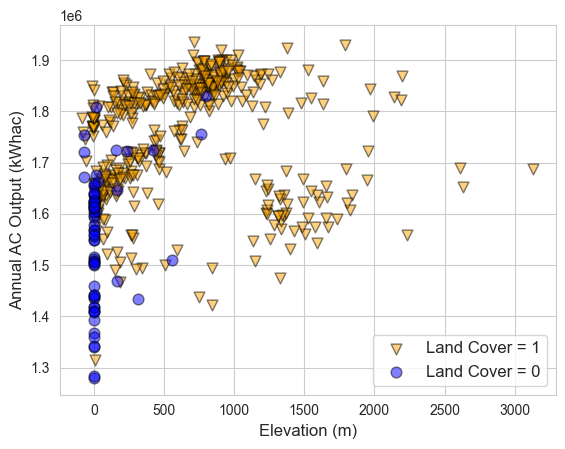

In [11]:
plt.scatter(data.loc[data.land_cover==1].elevation,
               data.loc[data.land_cover==1].ac_annual,
               label="Land Cover = 1",
               marker='v',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='orange')
plt.scatter(data.loc[data.land_cover==0].elevation,
               data.loc[data.land_cover==0].ac_annual,
               label="Land Cover = 0",
               marker='o',
               s=60,
               alpha=.5,
               edgecolor='black',
               c='blue')

plt.xlabel("Elevation (m)", fontsize=12)
plt.ylabel("Annual AC Output (kWhac)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)


plt.show()